### 다항회귀

In [2]:
options(repr.plot.width = 15, repr.plot.height = 8)

In [16]:
x <- seq(0, 15)
epsilon <- rnorm(16, 0, 4)
y <- -0.7*x^2+11*x-5+epsilon

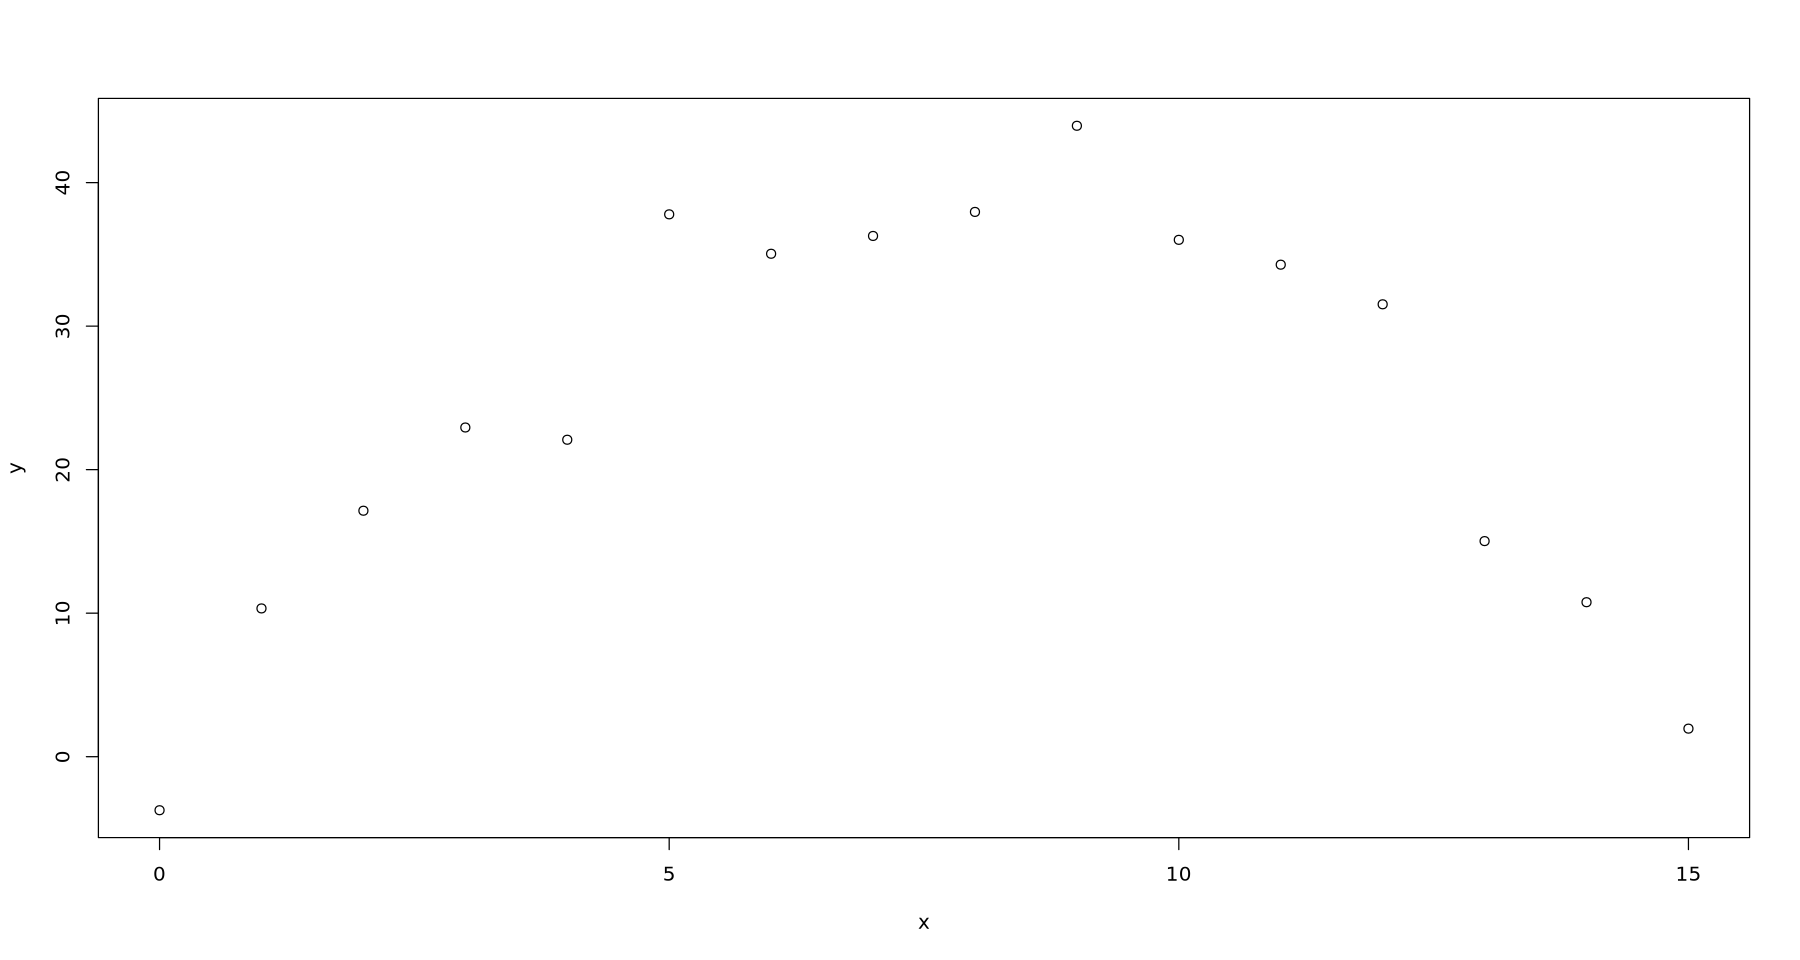

In [19]:
plot(x, y)

`-` 0을 중심으로 하게끔 shift한 플롯

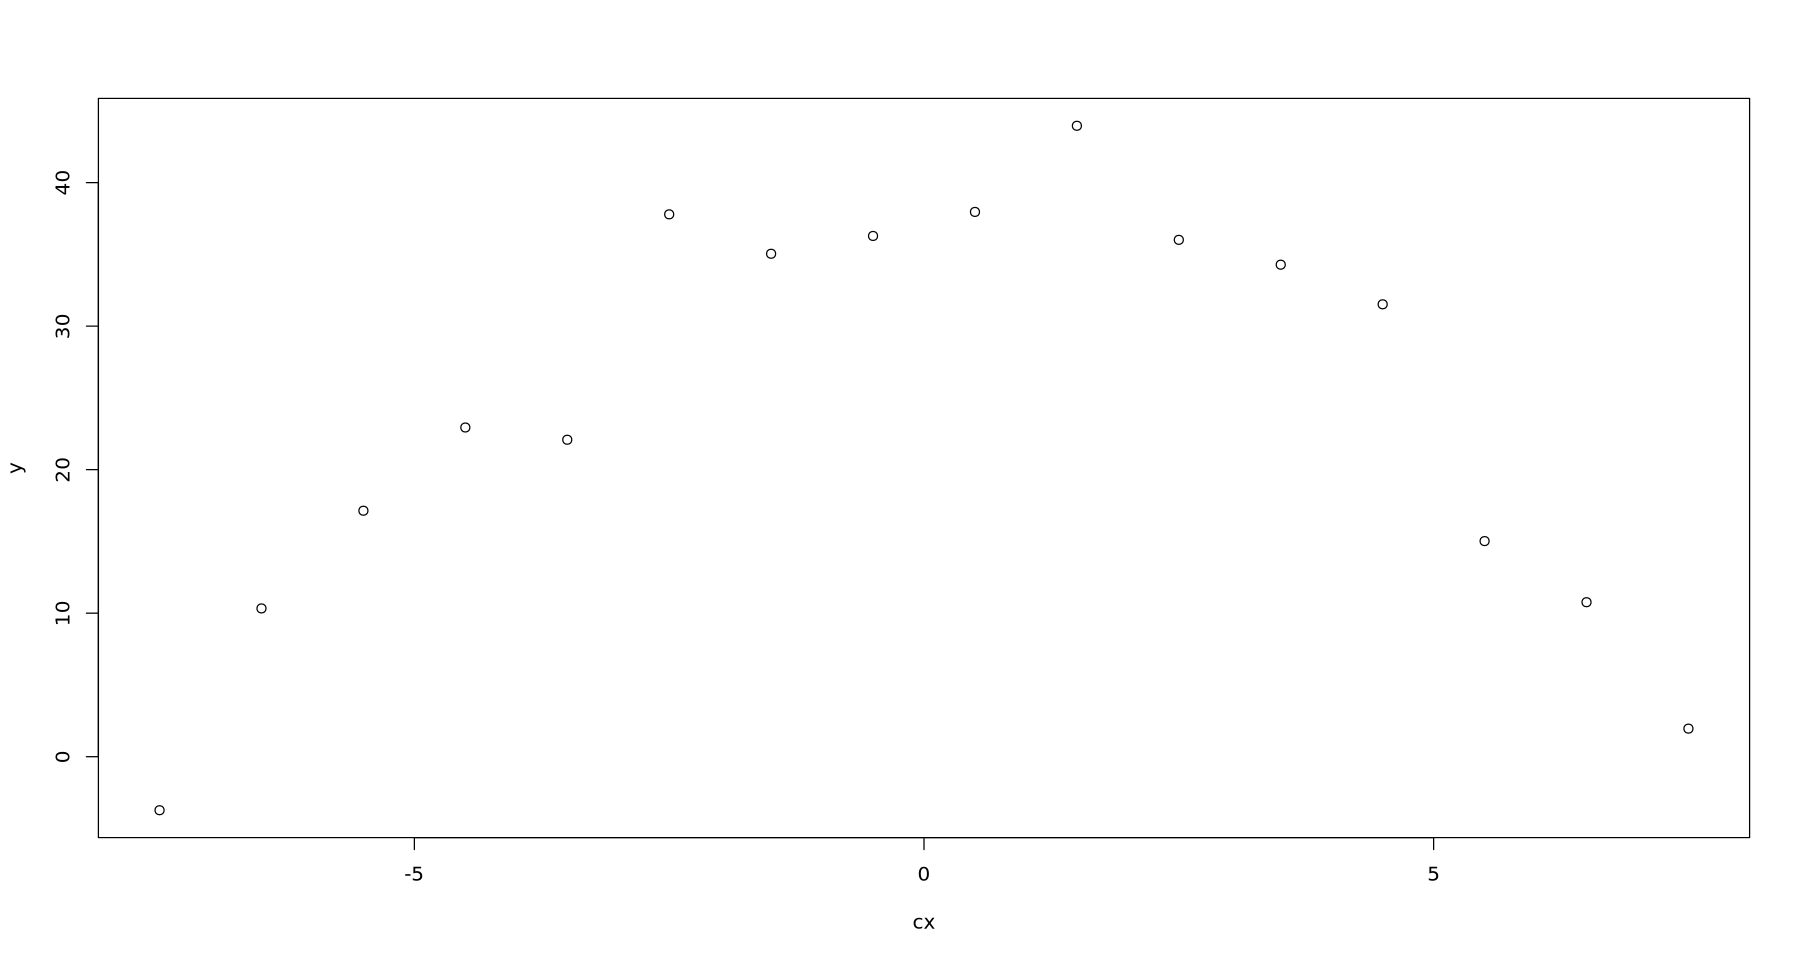

In [20]:
cx <- x - mean(x)
plot(cx, y)

In [21]:
hard_fit <- lm(y~x)
summary(hard_fit)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.310 -11.404   2.895  11.478  19.075 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  21.5790     7.0639   3.055  0.00857 **
x             0.3674     0.8024   0.458  0.65409   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.8 on 14 degrees of freedom
Multiple R-squared:  0.01475,	Adjusted R-squared:  -0.05562 
F-statistic: 0.2096 on 1 and 14 DF,  p-value: 0.6541


In [22]:
hard_fit_c <- lm(y~cx)
summary(hard_fit_c)


Call:
lm(formula = y ~ cx)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.310 -11.404   2.895  11.478  19.075 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  24.3344     3.6989   6.579 1.23e-05 ***
cx            0.3674     0.8024   0.458    0.654    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.8 on 14 degrees of freedom
Multiple R-squared:  0.01475,	Adjusted R-squared:  -0.05562 
F-statistic: 0.2096 on 1 and 14 DF,  p-value: 0.6541


> $\beta_0$의 값만 바뀌고, $\beta_1$의 값은 바뀌지 않았다.

정확히는 $ - \beta_1 \times \bar{x}$만큼 $\beta_0$의 값이 변하였다.

In [25]:
21.579 + 0.3674 * mean(x)

[1] 24.3345

`-` 다항회귀 모형

In [26]:
hard_fit_2 <- lm(y~x+I(x^2))
summary(hard_fit_2)


Call:
lm(formula = y ~ x + I(x^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3592 -1.6714 -0.3531  2.5265  5.5743 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.29074    2.48039  -1.327    0.207    
x           11.02584    0.76726  14.370 2.34e-09 ***
I(x^2)      -0.71056    0.04934 -14.401 2.28e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.729 on 13 degrees of freedom
Multiple R-squared:  0.9419,	Adjusted R-squared:  0.9329 
F-statistic: 105.3 on 2 and 13 DF,  p-value: 9.29e-09


> 훨씬 모형이 개선되었다.

In [27]:
hard_fit_c_2 <- lm(y~cx+I(cx^2))
summary(hard_fit_c_2)


Call:
lm(formula = y ~ cx + I(cx^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3592 -1.6714 -0.3531  2.5265  5.5743 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.43385    1.40305  28.106 5.01e-13 ***
cx           0.36738    0.20224   1.817   0.0924 .  
I(cx^2)     -0.71056    0.04934 -14.401 2.28e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.729 on 13 degrees of freedom
Multiple R-squared:  0.9419,	Adjusted R-squared:  0.9329 
F-statistic: 105.3 on 2 and 13 DF,  p-value: 9.29e-09


> $\beta_2$만 동일하고 나머지는 바뀌었다. 표준오차도 작아진다. (수식 대입해보면 당연함.)

In [30]:
print(paste("corr(x, x^2) = ", round(cor(x, x^2), 3)))
print(paste("corr(cx, cx^2) = ", round(cor(cx, cx^2), 3)))

[1] "corr(x, x^2) =  0.965"
[1] "corr(cx, cx^2) =  0"


> 굳이 센터링한 것을 쓸 필요는 없을 것 같다... 게다가 센터링 한 경우 $\beta_1$은 통계적으로 유의하지 않게 되었음

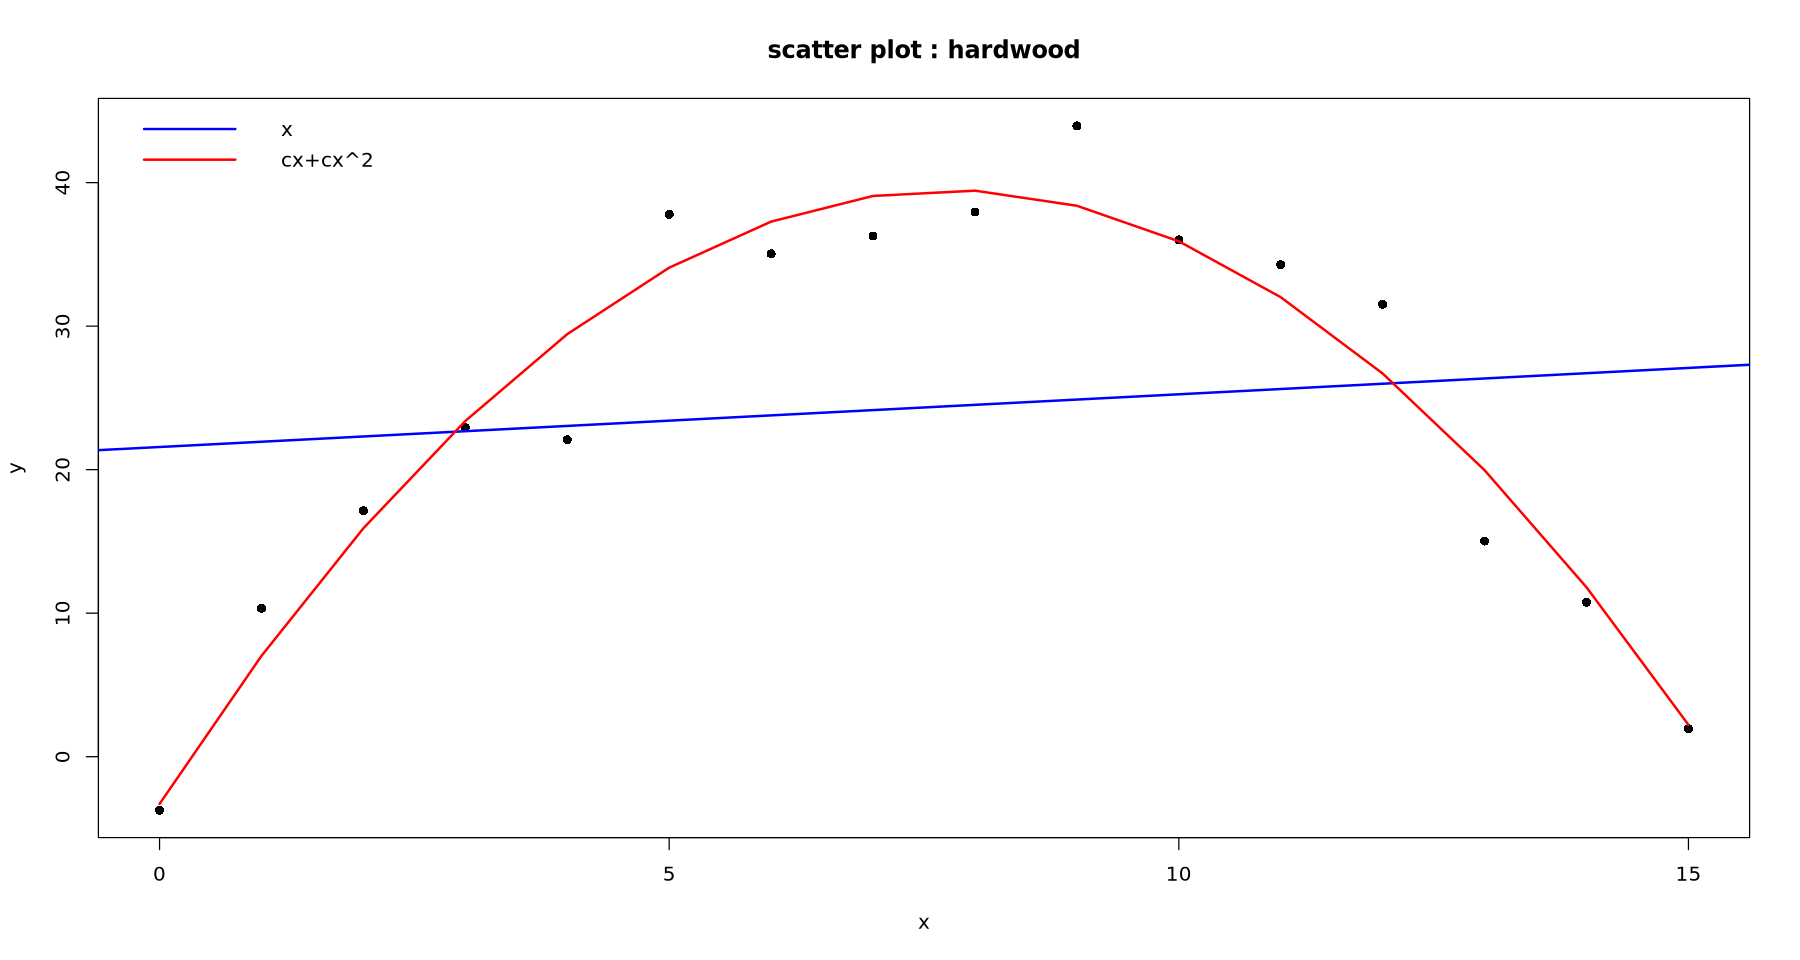

In [35]:
plot(y~x, pch = 16, main = "scatter plot : hardwood")
abline(hard_fit, col = "blue", lwd = 2)
lines(x, fitted(hard_fit_c_2), col = "red", lwd = 2)
legend("topleft", c("x", "cx+cx^2"), col=c('blue', 'red'), lwd=2, lty=1, bty = "n")

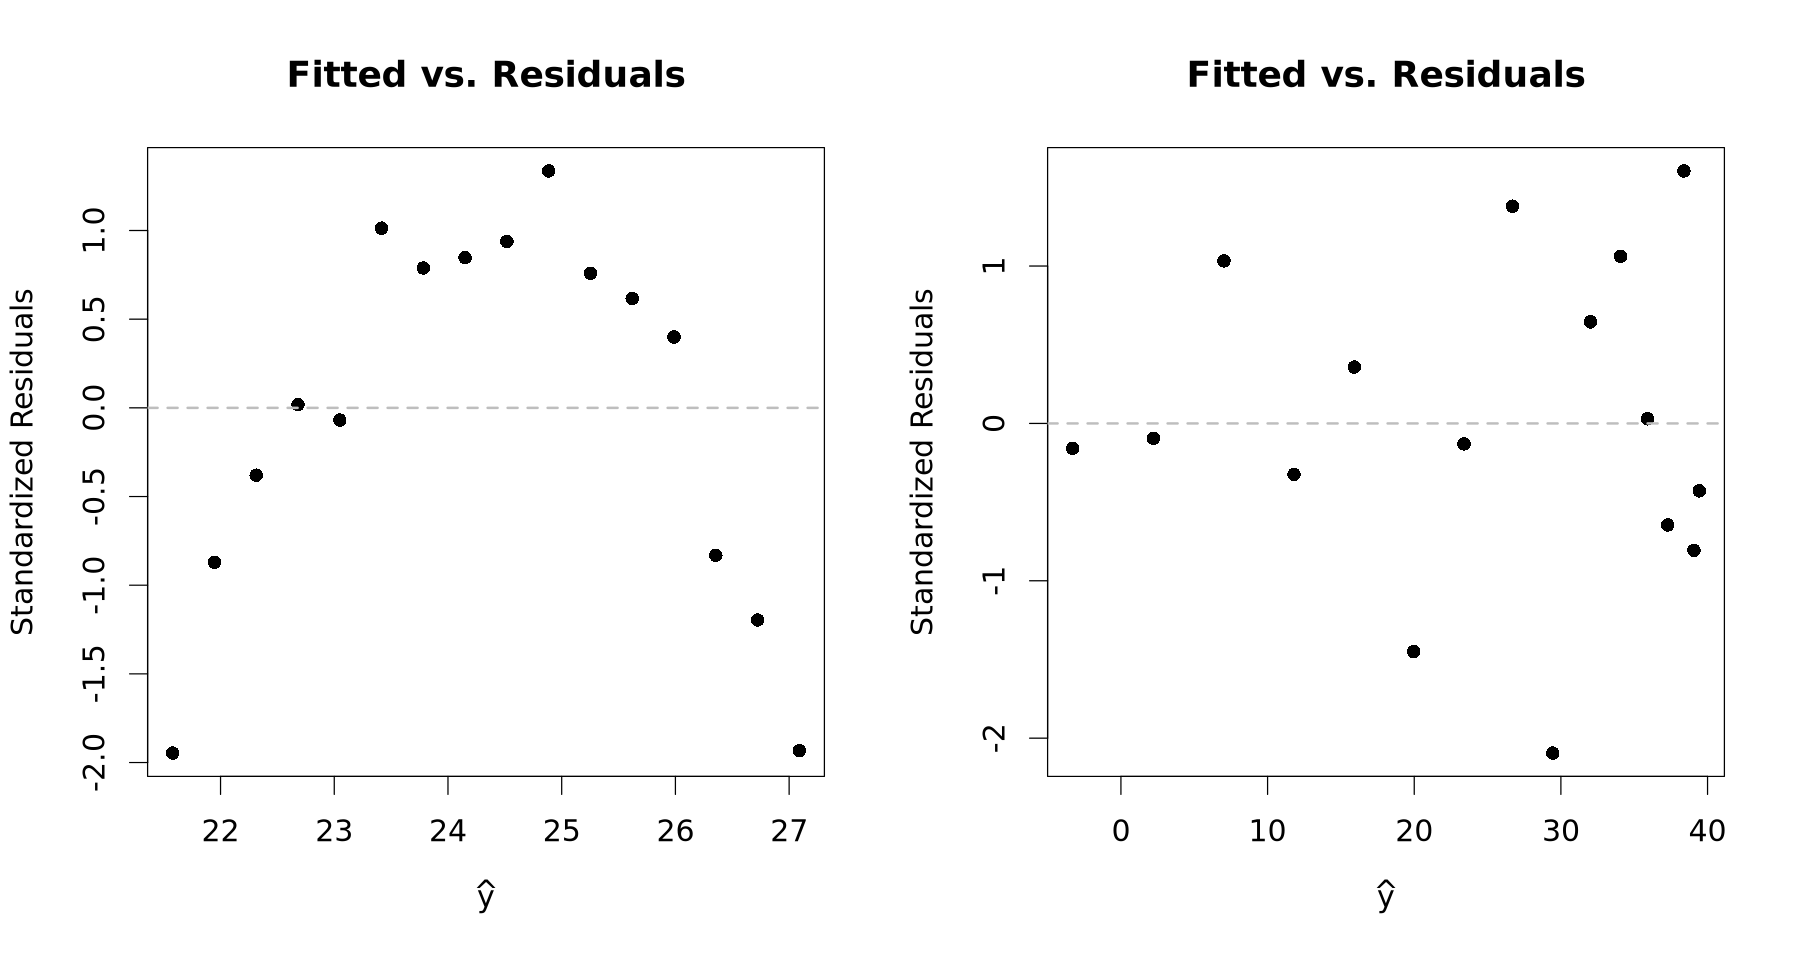

In [36]:
par(mfrow=c(1,2), cex = 1.5)
plot(fitted(hard_fit), rstandard(hard_fit), pch = 16,
 xlab = expression(hat(y)),
 ylab = "Standardized Residuals",
 main = "Fitted vs. Residuals")
abline(h = 0, col = "grey", lwd = 2, lty=2)
plot(fitted(hard_fit_c_2), rstandard(hard_fit_c_2), pch = 16,
 xlab = expression(hat(y)),
 ylab = "Standardized Residuals",
 main = "Fitted vs. Residuals")
abline(h = 0, col = "grey", lwd = 2, lty=2)

> 다항회귀에서는 잔차그림에서의 곡선 개형이 보이지 않았다. 등분산성이 조금 신경쓰이긴 하네...

`-` 3차항

In [39]:
summary(lm(y~cx+I(cx^2)+I(cx^3)))


Call:
lm(formula = y ~ cx + I(cx^2) + I(cx^3))

Residuals:
   Min     1Q Median     3Q    Max 
-6.085 -1.903  0.012  2.099  4.837 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.43385    1.38550  28.462 2.20e-12 ***
cx           0.90425    0.50631   1.786   0.0994 .  
I(cx^2)     -0.71056    0.04872 -14.583 5.36e-09 ***
I(cx^3)     -0.01411    0.01223  -1.154   0.2710    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.683 on 12 degrees of freedom
Multiple R-squared:  0.9477,	Adjusted R-squared:  0.9346 
F-statistic: 72.46 on 3 and 12 DF,  p-value: 5.874e-08


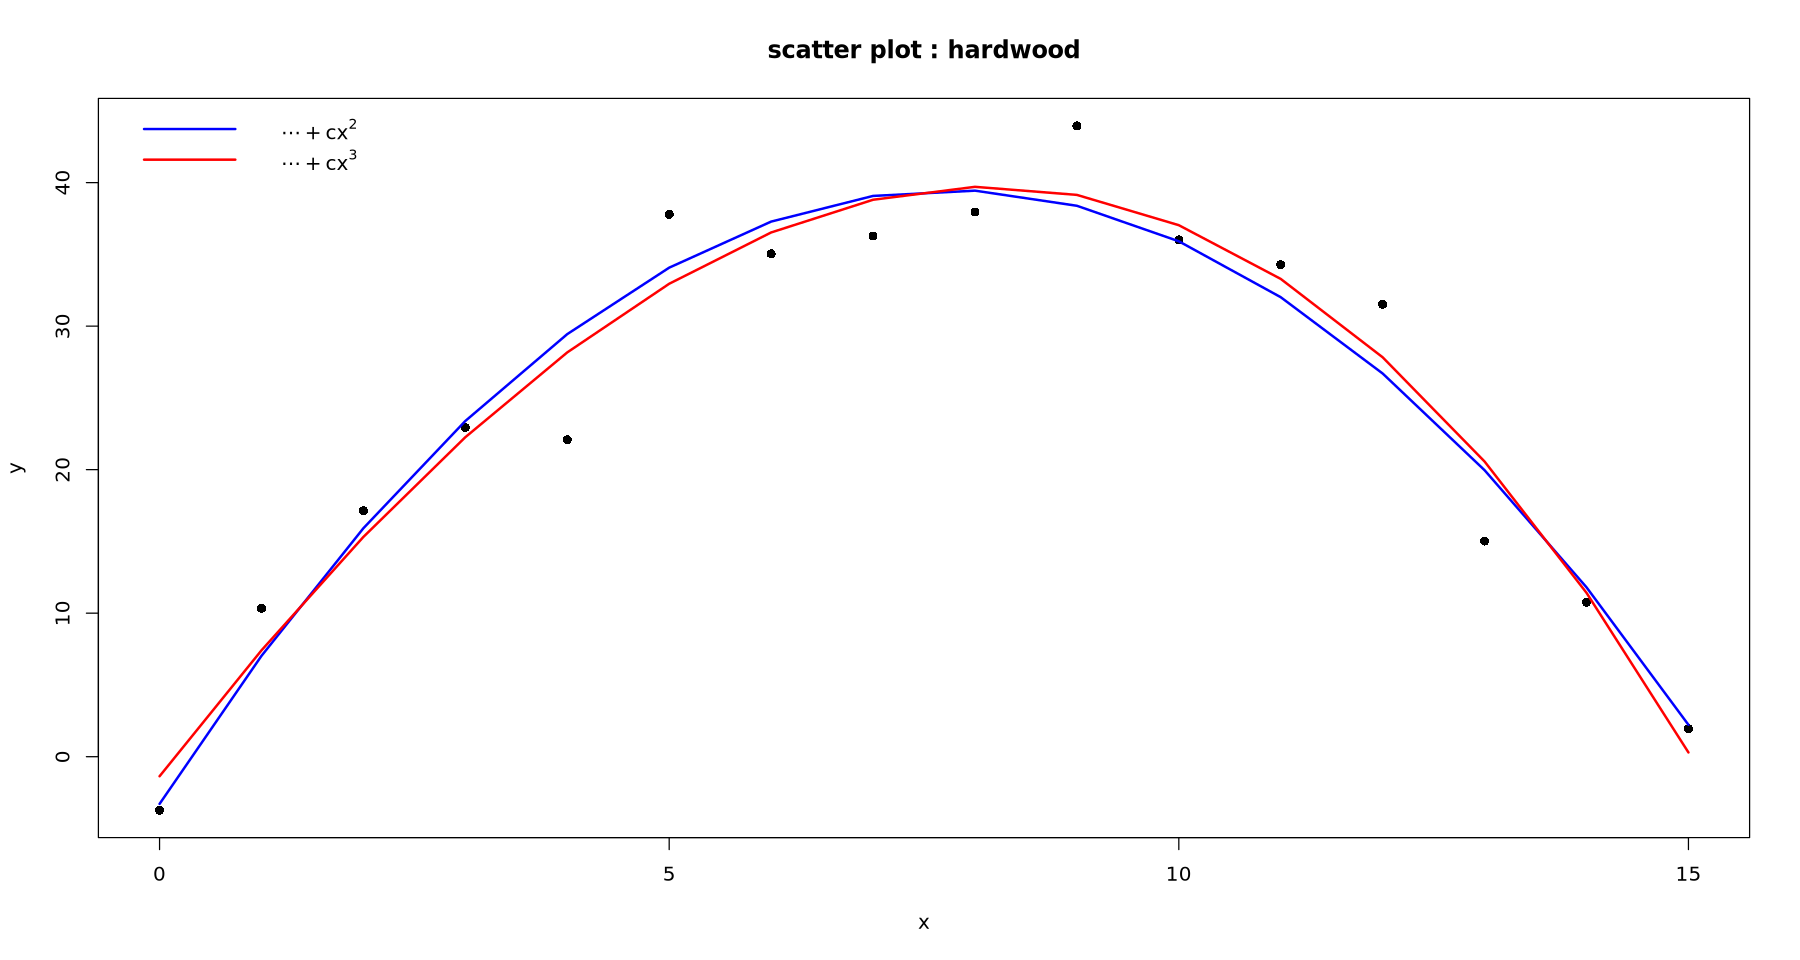

In [41]:
plot(y~x, pch = 16, main = "scatter plot : hardwood")
lines(x, fitted(hard_fit_c_2), col = "blue", lwd = 2)
lines(x, fitted(lm(y~cx+I(cx^2)+I(cx^3))), col = "red", lwd = 2)
legend("topleft", c(expression(cdots+cx^2), expression(cdots+cx^3)), col=c('blue', 'red'), lwd=2, lty=1, bty = "n")

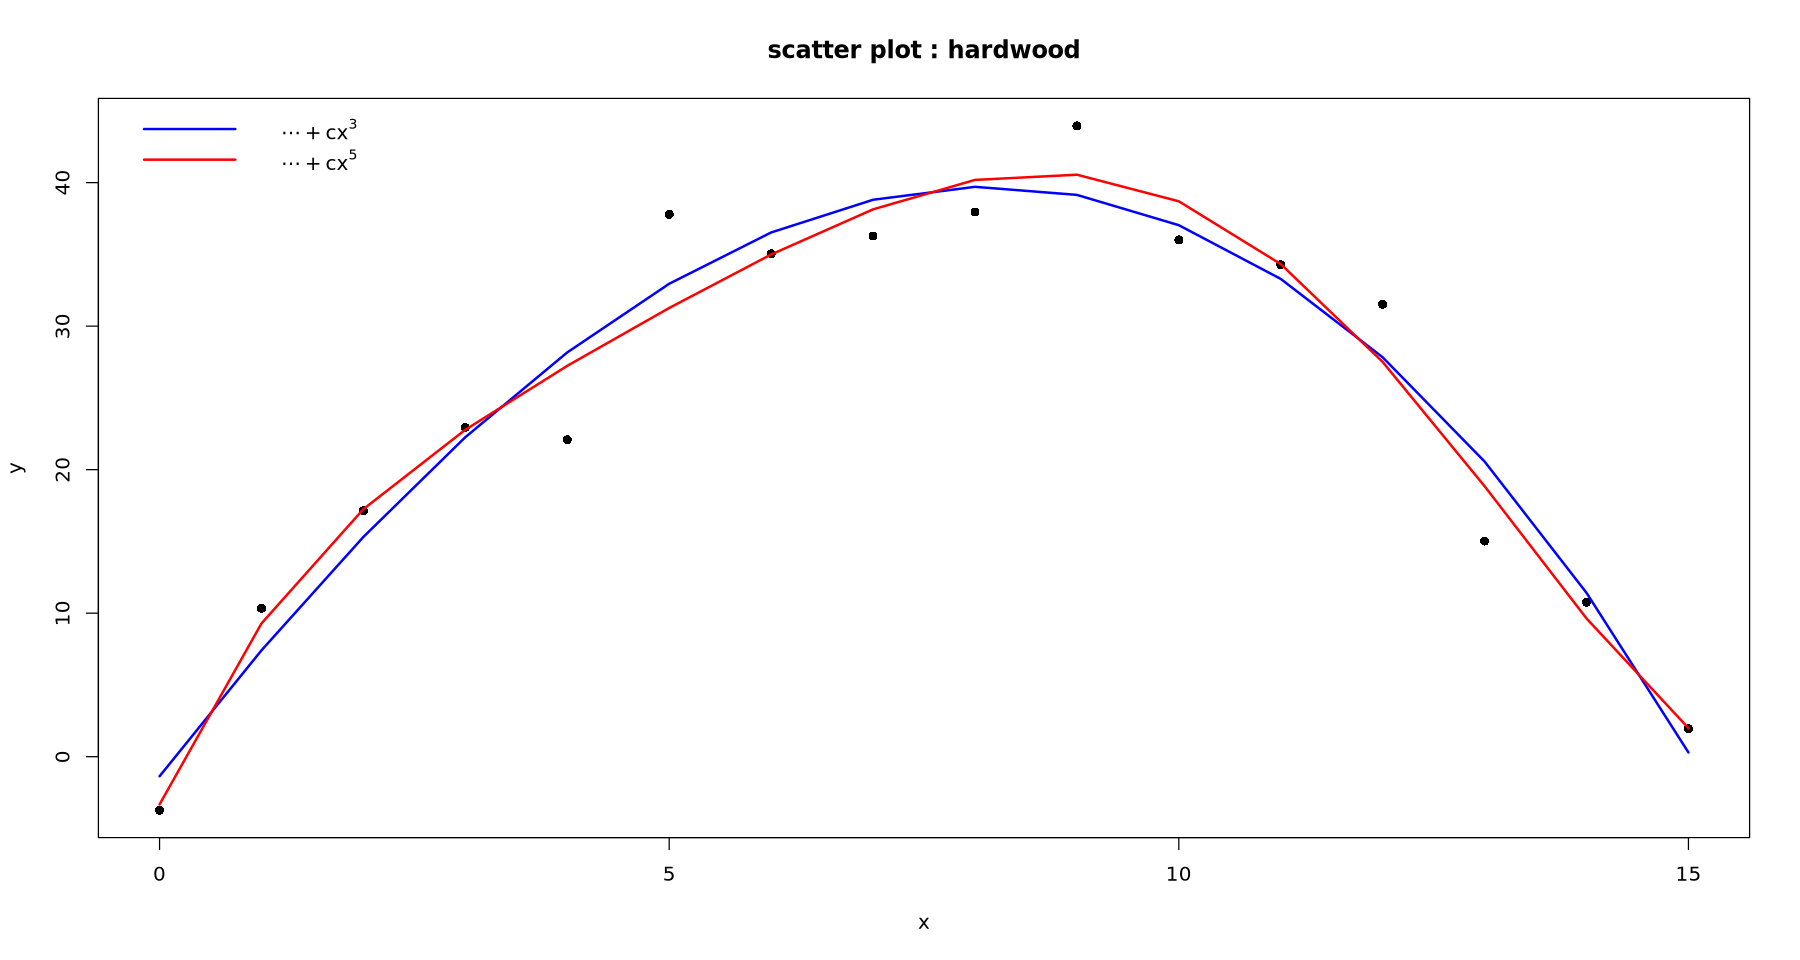

In [43]:
plot(y~x, pch = 16, main = "scatter plot : hardwood")
lines(x, fitted(lm(y~cx+I(cx^2)+I(cx^3))), col = "blue", lwd = 2)
lines(x, fitted(lm(y~cx+I(cx^2)+I(cx^3)+I(cx^4)+I(cx^5))), col = "red", lwd = 2)
legend("topleft", c(expression(cdots+cx^3), expression(cdots+cx^5)), col=c('blue', 'red'), lwd=2, lty=1, bty = "n")

> 오차항까지 적합하려 하고 있다. 따라서 너무 많이 하면 안좋음

In [44]:
summary(lm(y~cx+I(cx^2)+I(cx^3)+I(cx^4)+I(cx^5)))


Call:
lm(formula = y ~ cx + I(cx^2) + I(cx^3) + I(cx^4) + I(cx^5))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1499 -1.9482 -0.0383  1.0683  6.5236 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.3374055  1.7039101  23.087 5.25e-10 ***
cx           2.0773041  0.8867214   2.343  0.04115 *  
I(cx^2)     -0.6951496  0.1719076  -4.044  0.00235 ** 
I(cx^3)     -0.1025674  0.0567480  -1.807  0.10083    
I(cx^4)     -0.0002858  0.0030628  -0.093  0.92749    
I(cx^5)      0.0012789  0.0008020   1.595  0.14189    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.601 on 10 degrees of freedom
Multiple R-squared:  0.9583,	Adjusted R-squared:  0.9375 
F-statistic: 45.99 on 5 and 10 DF,  p-value: 1.399e-06
